In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

/Users/mpitlyk/miniconda3/envs/ds3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/mpitlyk/miniconda3/envs/ds3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mpitlyk/miniconda3/envs/ds3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mpit

In [2]:

from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [3]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, 150, 150)
else:
    input_shape = (150, 150, 3)

### Data paths

In [4]:
train_path = '/Users/mpitlyk/Documents/Python/repos/learning-ds/Adi/close/train'
val_path = '/Users/mpitlyk/Documents/Python/repos/learning-ds/Adi/close/val'
test_path = '/Users/mpitlyk/Documents/Python/repos/learning-ds/Adi/close/test'

### Look at some of train data

Found 7 images belonging to 3 classes.
(6, 150, 150, 3)


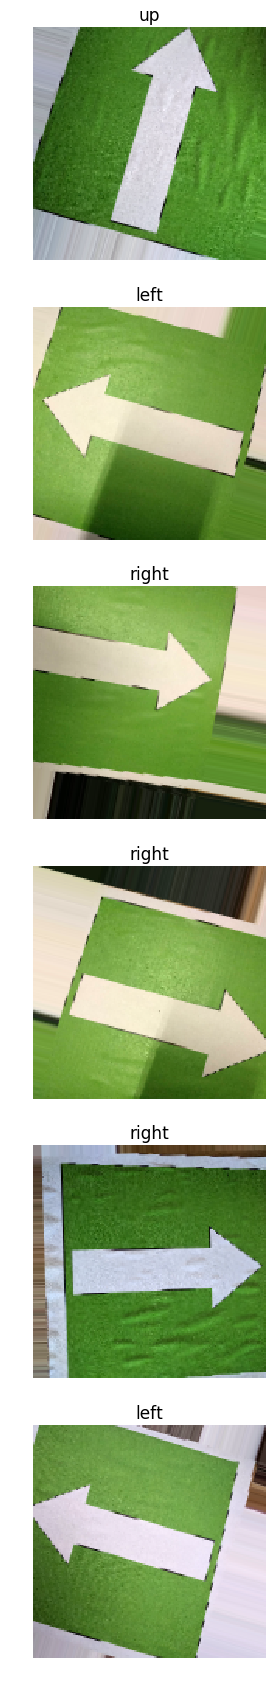

In [10]:
batch_size = 6

# Create data generator
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)


generator = datagen.flow_from_directory(train_path,
                target_size=(150, 150),
                batch_size=batch_size)

# index to class mapping
ind_to_class = {v:k for k,v in generator.class_indices.items()}

# Get one batch
batch = next(generator)
print(batch[0].shape)

# Plot batch
fig, ax = plt.subplots(batch_size, 1, figsize=(10, 5 * batch_size))
for i in range(batch_size):
    img = image.array_to_img(batch[0][i])
    label = ind_to_class[batch[1][i].argmax()]
    
    plt.subplot(batch_size, 1, i+1)
    plt.imshow(img)
    plt.title(label, size=17)
    plt.axis('off')
    

plt.show()

### Build model

In [69]:
# Initialize model
model = Sequential()

# Input later is implicit

# Add hidden layers

# To experiment:
# - Change number of nodes in any layer
# - Number of layers (within each group)
# - Number of "groups"
# - Add another dense layer to "classifcation" section

# - Try different activation functions

# First convoluation group
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# # Next convoluation group
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# Drop for regularization
model.add(Dropout(0.25))

# Reshape data so it can go to a Dense layer
model.add(Flatten())

# Dense layer for classification
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer with number of nodes equal to number of classes
model.add(Dense(3, activation='softmax'))

# Compile model with loss funtion, optimizer, and metrics
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Build data generators

In [70]:
# Instantiate classes
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

val_datagen = ImageDataGenerator(
    rescale=1./255)

In [71]:
# Make generators
train_generator = train_datagen.flow_from_directory(train_path,
        target_size=(150, 150),
        batch_size=10)

val_generator = val_datagen.flow_from_directory(val_path,
                                               target_size=(150, 150),
                                               batch_size=1)

Found 7 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


### Train model

In [72]:
from keras.callbacks import Callback

class PerfectAcc(Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['val_acc'] == 1:
            self.model.stop_training = True
            print('Training stopped.')

In [73]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=10,
      verbose=1,
      validation_data=val_generator,
      validation_steps=4,
      callbacks=[PerfectAcc()])

Epoch 1/10
10/10 [==============================] - 21s 2s/step - loss: 3.9641 - acc: 0.4143 - val_loss: 1.0867 - val_acc: 0.2500
Epoch 2/10
10/10 [==============================] - 18s 2s/step - loss: 1.0710 - acc: 0.5000 - val_loss: 0.9053 - val_acc: 0.7500
Epoch 3/10
10/10 [==============================] - 18s 2s/step - loss: 1.0501 - acc: 0.6000 - val_loss: 0.8460 - val_acc: 1.0000
Training stopped.


In [74]:
model.save('arrow_model_100.h5')

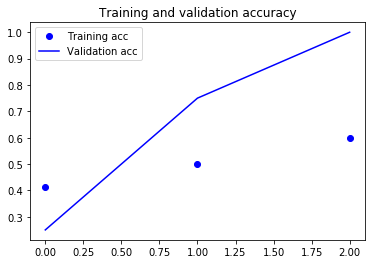

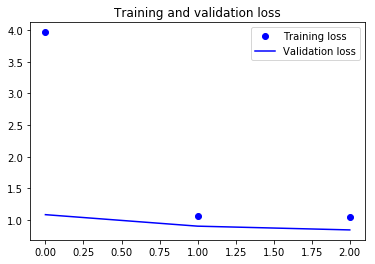

In [80]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Predict on test set

In [75]:
import itertools

In [76]:
# Use the validation set as the test set until we get more images
test_generator = val_datagen.flow_from_directory(test_path,
                                               target_size=(150, 150),
                                               batch_size=1)

Found 4 images belonging to 3 classes.


In [77]:
# Set `workers` equal to the number of cores in your CPU.
score = model.evaluate_generator(test_generator, steps=4)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8460488170385361
Test accuracy: 1.0


In [78]:
# Get multiple batches at once
samples = list(zip(*itertools.islice(test_generator, 4)))
images = np.concatenate(samples[0])
classes = np.array(samples[1])

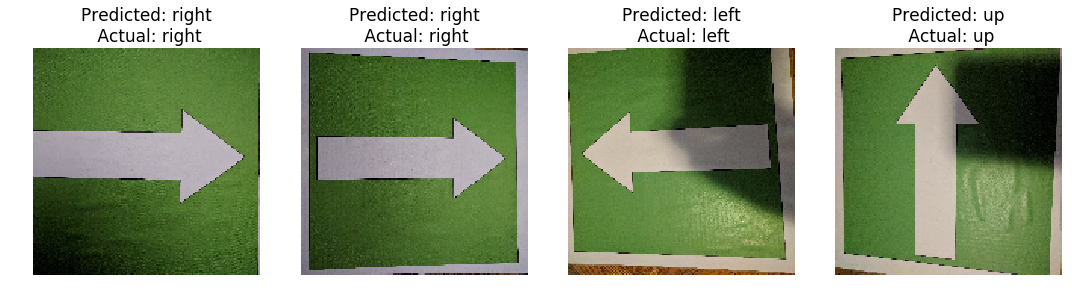

In [79]:
fig, ax = plt.subplots(1, 4, figsize=(15,4))

y_pred = model.predict_classes(images)

# Create mapping from class to label
class_map = {v:k for k,v in test_generator.class_indices.items()}

for i, tup in enumerate(zip(images, classes)):
    img, label = tup
    plt.subplot(1, 4, i+1)
    plt.imshow(img)#, cmap=cm.gray)
    plt.axis('off')
    plt.title(f'Predicted: {class_map[y_pred[i]]}\n Actual: {class_map[label.argmax()]}', size=17)

plt.tight_layout()